In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Building a simulator in 2D

Euler Integration

In [2]:
def simulate(Δt, z):
    a=-9.8
    p_dot=z[3:]
    p_ddot=array([0.,0.,a])
    u = concatenate([p_dot,p_ddot])
    z=z + Δt*u
    return z

calculated the time it takes for an object from a height of +10 to hit 
the ground at height 0. s = ut + (1/2)at^2 where 's' is the total distance,
'u' is initial velocity, 't' is time and 'a' is acceleration due to gravity

In [3]:
tf=1.42784
Δt = 0.1  #Time Step
time = linspace(0.,tf,int(tf/Δt)+1)

Initial Conditions

In [4]:
z = array([0.,0.,10.,0.,0.,0.])
z_log = [copy(z)]

[[  0.      0.     10.      0.      0.      0.   ]
 [  0.      0.     10.      0.      0.     -0.98 ]
 [  0.      0.      9.902   0.      0.     -1.96 ]
 [  0.      0.      9.706   0.      0.     -2.94 ]
 [  0.      0.      9.412   0.      0.     -3.92 ]
 [  0.      0.      9.02    0.      0.     -4.9  ]
 [  0.      0.      8.53    0.      0.     -5.88 ]
 [  0.      0.      7.942   0.      0.     -6.86 ]
 [  0.      0.      7.256   0.      0.     -7.84 ]
 [  0.      0.      6.472   0.      0.     -8.82 ]
 [  0.      0.      5.59    0.      0.     -9.8  ]
 [  0.      0.      4.61    0.      0.    -10.78 ]
 [  0.      0.      3.532   0.      0.    -11.76 ]
 [  0.      0.      2.356   0.      0.    -12.74 ]
 [  0.      0.      1.082   0.      0.    -13.72 ]
 [  0.      0.     -0.29    0.      0.    -14.7  ]]


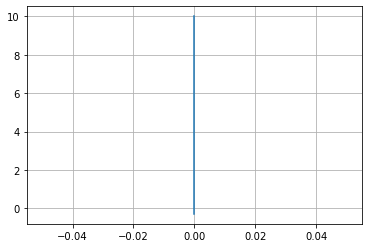

In [5]:
for t in time:
    z = simulate(Δt,z)
    z_log.append(copy(z))
z_log = array(z_log)

print(z_log)

grid()
plot(z_log[:,0],z_log[:,2])

# Animation

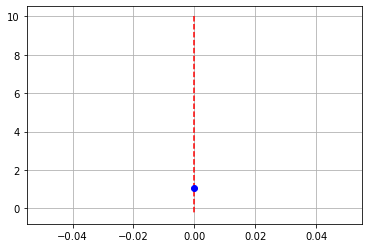

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML


fig, ax = subplots()
def animate(t):
    ax.clear()
    
    #Path
    plot(z_log[:,0],z_log[:,2], 'r--')
 
    #Initial Conditions
    plot(z_log[t,0], z_log[t,2], 'bo')
    
    grid()
    
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())